In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

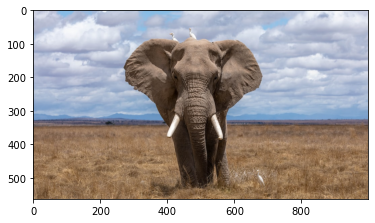

In [2]:
img = cv2.imread('elephant.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
original_img = img
plt.show()

In [3]:
print(img.shape)

(563, 1000, 3)


In [4]:
# Flatten each channel of the image in linear array
all_pixels = img.reshape((563*1000, 3))

In [5]:
print(all_pixels.shape)

(563000, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [8]:
centers = km.cluster_centers_

In [9]:
centers = np.array(centers, dtype='uint8')

In [10]:
print(centers)

[[145 116  90]
 [207 213 227]
 [ 68  51  38]
 [164 180 206]]


# Plot what all colors are these values?

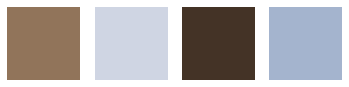

In [11]:
i = 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    
    #color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

# Segmenting our original image

In [12]:
new_img = np.zeros((563*1000, 3),dtype = 'uint8')
print(new_img.shape)

(563000, 3)


In [13]:
a = km.labels_
print(len(a))
colors

563000


[array([145, 116,  90], dtype=uint8),
 array([207, 213, 227], dtype=uint8),
 array([68, 51, 38], dtype=uint8),
 array([164, 180, 206], dtype=uint8)]

In [14]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_img.shape))

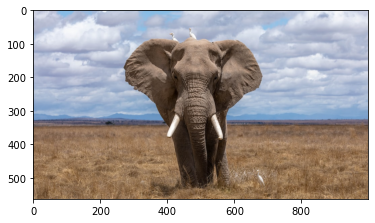

In [15]:
plt.imshow(new_img)
plt.imshow(original_img)
plt.show()

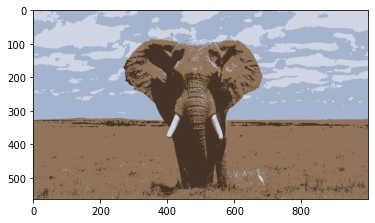

In [16]:
plt.imshow(new_img)
plt.show()